# English Word Counts

Context, purpose & process description:<br>
&emsp;    - 3esl.csv consists of words from ESL dictionaries (source: http://wordlist.aspell.net/12dicts/)<br>
&emsp;    - using 3esl.csv do the followings:<br>
&emsp;&emsp;        - create a bar chart showing word count for varying word lengths <br>
&emsp;&emsp;        - create a bar and pie chart showing word count based on first letter<br>

In [1]:
import pandas as pd

In [2]:
!pip install -U pandasql

In [3]:
from pandasql import sqldf

In [4]:
df = pd.read_csv('3esl.csv')
df

,A
0,a
1,aback
2,abacus
3,abandon
4,abandoned
...,...
21871,zoologist
21872,zoology
21873,zoom
21874,zoom lens


In [5]:
words_series = df.squeeze()
words_series

0                a
1            aback
2           abacus
3          abandon
4        abandoned
           ...    
21871    zoologist
21872      zoology
21873         zoom
21874    zoom lens
21875     zucchini
Name: A, Length: 21876, dtype: object

In [6]:
length_series = words_series.str.len()
length_series

0        1
1        5
2        6
3        7
4        9
        ..
21871    9
21872    7
21873    4
21874    9
21875    8
Name: A, Length: 21876, dtype: int64

In [7]:
fletter_series = words_series.str[0]
fletter_series

0        a
1        a
2        a
3        a
4        a
        ..
21871    z
21872    z
21873    z
21874    z
21875    z
Name: A, Length: 21876, dtype: object

In [8]:
df = pd.concat([words_series, length_series, fletter_series], axis = 1)
df.columns = ["word", "length", "fletter"]
df

,word,length,fletter
0,a,1,a
1,aback,5,a
2,abacus,6,a
3,abandon,7,a
4,abandoned,9,a
...,...,...,...
21871,zoologist,9,z
21872,zoology,7,z
21873,zoom,4,z
21874,zoom lens,9,z


In [9]:
df_wl = sqldf("SELECT COUNT(word) as 'Word Count', length as 'Word Length' FROM df GROUP BY length", globals())

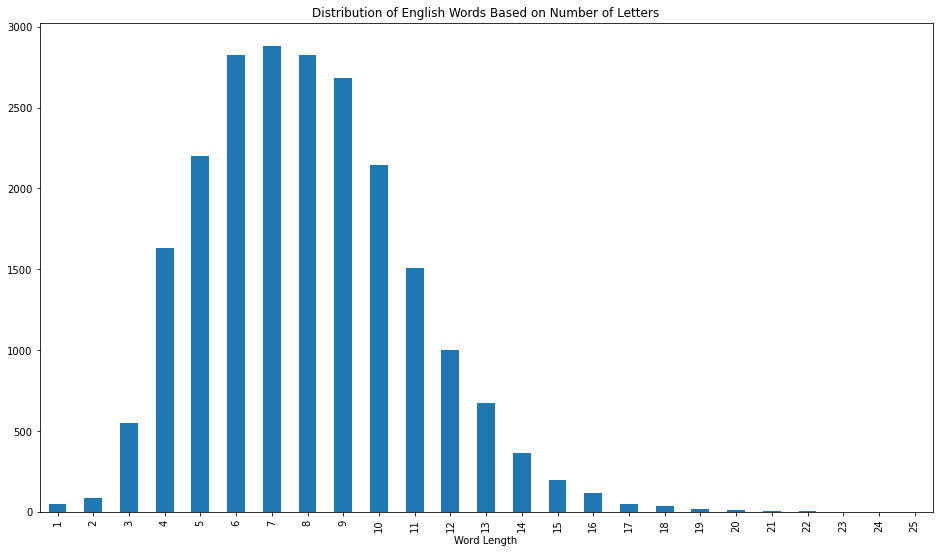

In [10]:
plot = df_wl.plot.bar(title = "Distribution of English Words Based on Number of Letters", 
                      x = 'Word Length', 
                      y = 'Word Count',
                      figsize = (16,9),
                      legend = False)

In [11]:
df_fletter_ct = sqldf("SELECT COUNT(word) as 'Word Count', lower(fletter) as 'First Letter' FROM df GROUP BY lower(fletter)", globals())

In [12]:
df_fletter_ct

,Word Count,First Letter
0,3,'
1,1320,a
2,1148,b
3,2033,c
4,1294,d
5,908,e
6,1077,f
7,770,g
8,872,h
9,1067,i


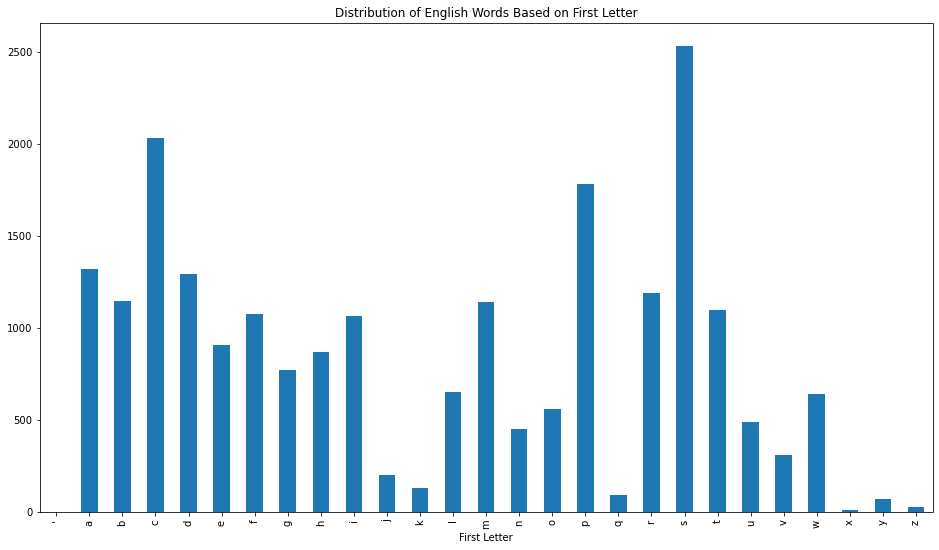

In [13]:
plot = df_fletter_ct.plot.bar(title = "Distribution of English Words Based on First Letter", 
                              x = 'First Letter', 
                              y = 'Word Count',
                              figsize = (16,9),
                              legend = False)

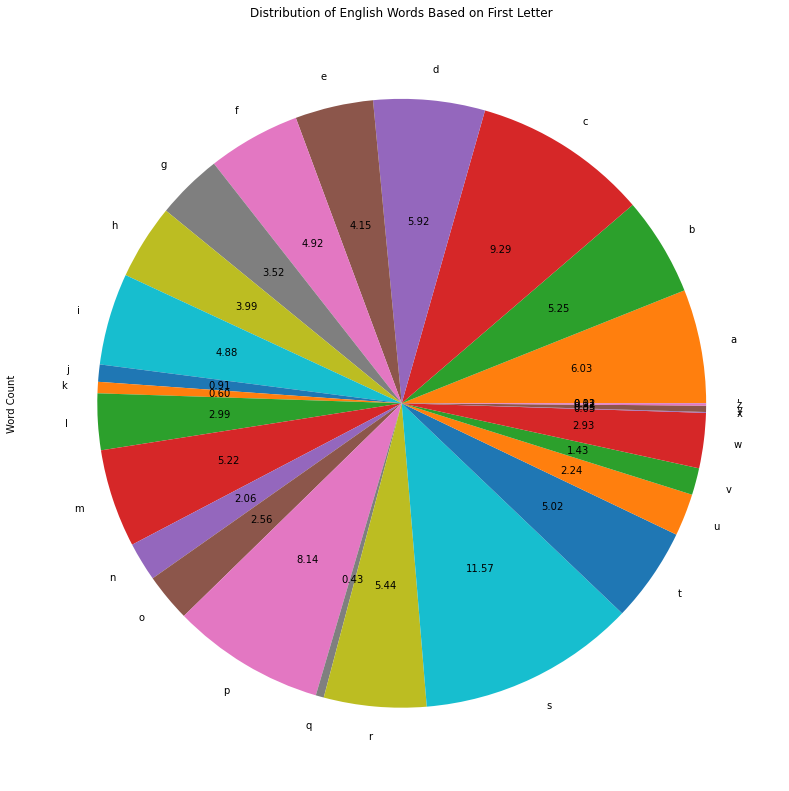

In [14]:
plot = df_fletter_ct.plot.pie(title = "Distribution of English Words Based on First Letter",
                              y = 'Word Count', 
                              labels = df_fletter_ct['First Letter'],
                              legend = False,
                              figsize = (14,14),
                              autopct='%.2f')